# Dive into Networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [ ]:
G = nx.Graph()

In [ ]:
# python의 hashable object는 모두 추가할 수 있다.. str, tuple도 가
G.add_node(0)

In [ ]:
# 여러 개의 node를 한 번에 추가
G.add_nodes_from([1, 2, 3])

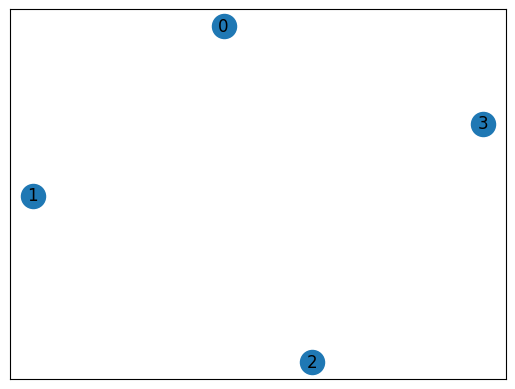

In [ ]:
nx.draw_networkx(G)

In [ ]:
G.add_edge(0, 1)

In [ ]:
# edge가 많으면 file에서 가져올 수도 있다.
G.add_edges_from([(1, 2), (2, 3), (3, 1)])

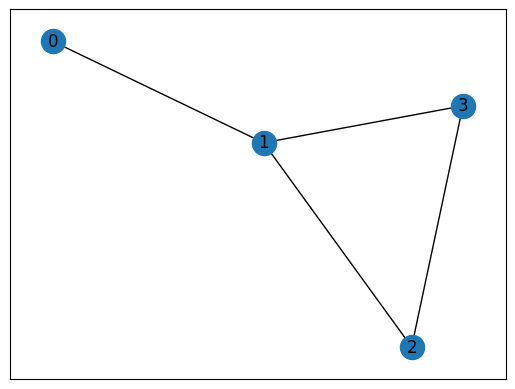

In [ ]:
nx.draw_networkx(G)

In [ ]:
print(G.number_of_nodes(), G.number_of_edges())

4 4


In [ ]:
# views
# 다 dynamic한 dictionary 형태로 주어지고, 수정은 불가능하다.
print("G.nodes = ", G.nodes)        # list
print("G.edges = ", G.edges)        # list of tuples
print("G.degree = ", G.degree)      # list of tuples (node, degree)

# dictionary of dictionary of dictionary..
# 첫 번째 dictionary : key가 node이고, value는 이웃 노드들의 정보를 갖는 dictionary
# 두 번째 dictionary : key가 이웃 노드이고, value가 edge의 attribute 정보를 갖는 dictionary
# 결국 edge에도 attribute가 있다!!
"""
ex) {0: {1 : {}, 2 : {}}, ...} 
-> node 0과 node 1, 2와 연결된 edge가 있고, 아직 각 edge들의 attributes는 없는 상태다.
"""
print("G.adj = ", G.adj)            

G.nodes =  [0, 1, 2, 3]
G.edges =  [(0, 1), (1, 2), (1, 3), (2, 3)]
G.degree =  [(0, 1), (1, 3), (2, 2), (3, 2)]
G.adj =  {0: {1: {}}, 1: {0: {}, 2: {}, 3: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 1: {}}}


In [ ]:
# Add attributes to nodes
"""
Super widely Used!
"""
for i in G.nodes:
    G.nodes[i]['smoking'] = False
    G.nodes[i]['weight'] = random.choice(range(100,200))
G.nodes[1]['smoking'] = True

In [ ]:
for i in G.nodes:
    print(i, G.nodes[i])

print("G.nodes.data() : ", G.nodes.data())

0 {'smoking': False, 'weight': 172}
1 {'smoking': True, 'weight': 125}
2 {'smoking': False, 'weight': 165}
3 {'smoking': False, 'weight': 184}
G.nodes.data() :  [(0, {'smoking': False, 'weight': 172}), (1, {'smoking': True, 'weight': 125}), (2, {'smoking': False, 'weight': 165}), (3, {'smoking': False, 'weight': 184})]


In [ ]:
# Add attributes to edges
"""
Super widely Used!
"""
for e in G.edges:
    G.edges[e]['strength'] = round(random.random(), 2)

# list of tuples : ( node1, node2, attributes(dictionary) )
print("G.edges.data(): ", G.edges.data())
print("G.adj: ", G.adj)

G.edges.data():  [(0, 1, {'strength': 0.87}), (1, 2, {'strength': 0.66}), (1, 3, {'strength': 0.46}), (2, 3, {'strength': 0.38})]
G.adj:  {0: {1: {'strength': 0.87}}, 1: {0: {'strength': 0.87}, 2: {'strength': 0.66}, 3: {'strength': 0.46}}, 2: {1: {'strength': 0.66}, 3: {'strength': 0.38}}, 3: {2: {'strength': 0.38}, 1: {'strength': 0.46}}}


In [ ]:
# 3 ways of iterating over the neighbors of a node
#  #2 most widely used operation in graphs
print("Using G.adj[2]:")
print("G.adj[2]: ", G.adj[2])
for nbr in G.adj[2]:
    print(nbr)

print()
# Widely Used
"""
# -> G[2]도 하나의 graph view이고, G.adj[2]랑 똑같다.!!!!!
"""
print("Using G[2]:")
print("G[2]: ", G[2])
for nbr in G[2]:    
    print(nbr)

print()
# 얘가 제일 명확하게 이웃을 순회한다는 걸 보자마자 알 수 있긴 하다.
print("Using G.neighbors(2): ")
print("G.neighbors(2): ", G.neighbors(2))
for nbr in G.neighbors(2):
    print(nbr)      # node 2의 이웃들
"""
    print(G[2][nbr]['strength'])   # 2와 해당 이웃의 attribution
    print(G.nodes[nbr]['weight'])     # node 정보를 알려면 G.node를 사용해야 한다.
"""

Using G.adj[2]:
G.adj[2]:  {1: {'strength': 0.66}, 3: {'strength': 0.38}}
1
3

Using G[2]:
G[2]:  {1: {'strength': 0.66}, 3: {'strength': 0.38}}
1
3

Using G.neighbors(2): 
G.neighbors(2):  <dict_keyiterator object at 0x7f3b74131210>
1
3


"\n    print(G[2][nbr]['strength'])   # 2와 해당 이웃의 attribution\n    print(G.nodes[nbr]['weight'])     # node 정보를 알려면 G.node를 사용해야 한다.\n"

# Visualize Network

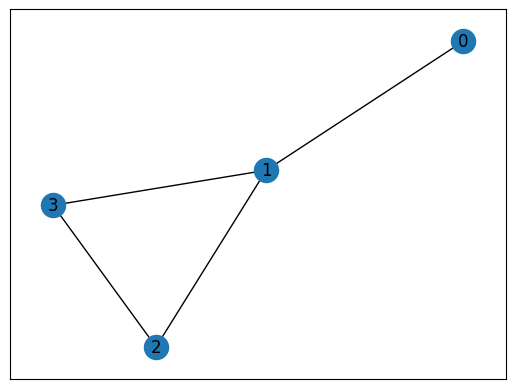

In [ ]:
# simple 1-line code
nx.draw_networkx(G)

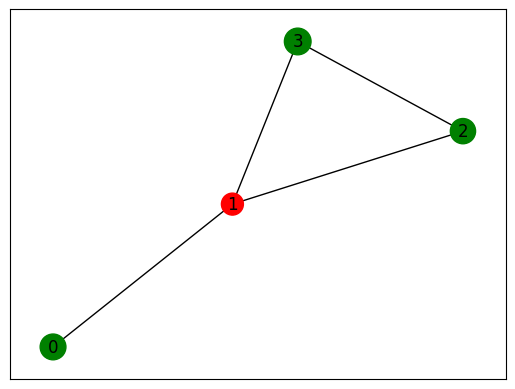

In [ ]:
plt.figure(1)
# more Elaborate
color_map = []  # smoker : red, non smoker : green
size_map = []   # scaling proportional to weight
for i in G.nodes:
    size_map.append(G.nodes[i]['weight'] * 2)
    if G.nodes[i]['smoking']:
        color_map.append('red')
    else:
        color_map.append('green')

nx.draw_networkx(G,
                 node_color=color_map,
                 node_size=size_map,
                 # spring_layout이 iterative하게 node의 위치를 조정하는 알고리즘임.
                 # edge 있는 건 가까이, 없는 건 멀리 보냄.
                 # 매번 initial value가 다르기 때문에 node 위치가 실행할 때마다 다름.
                 pos=nx.spring_layout(G, iterations=1000),  
                 arrows=False, with_labels=True)
plt.show()

# Use graph generators

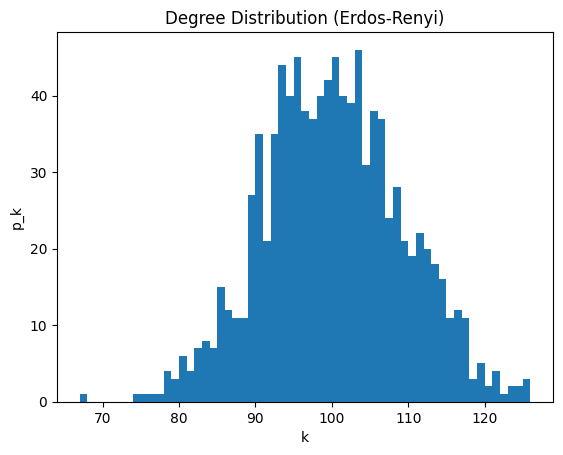

In [ ]:
# Erdos-Renyi random graph & degree distribution
plt.figure(2)
# 1000개의 node, 하나의 node가 다른 node로 edge를 연결시킬 확률이 0.1
G_Erdos = nx.erdos_renyi_graph(1000, 0.1)

# 왜 G_Erdos.degree는 딕셔너리 형태로 나올까..?
# print(G_Erdos.degree)
degrees = [G_Erdos.degree[i] for i in G_Erdos.nodes]

plt.xlabel('k')
plt.ylabel('p_k')
plt.title('Degree Distribution (Erdos-Renyi)')

# poisson 분포를 따른다.. ( lambda는 뭐고? )
plt.hist(degrees, bins=range(min(degrees), max(degrees)))

plt.show()

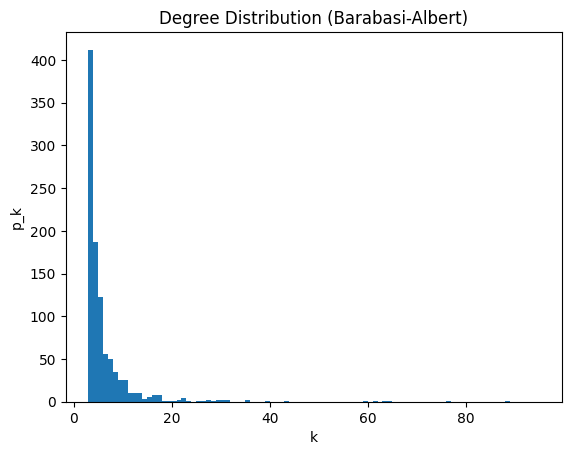

In [ ]:
# Barabasi-Albert preferential attachment graph & degree distribution
plt.figure(3)

# 얘는 node를 하나씩 추가해가면서 graph를 생성함.
# node 추가할 때 마다 edge 3개 만듦.
G_Barabasi = nx.barabasi_albert_graph(1000, 3)

# 얘도 왜 .degree가 딕셔너리로 나오노..?
degrees = [G_Barabasi.degree[i] for i in G_Barabasi.nodes]

plt.xlabel('k')
plt.ylabel('p_k')
plt.title('Degree Distribution (Barabasi-Albert)')

# exponential low 분포를 따른다.
plt.hist(degrees, bins=range(min(degrees), max(degrees)))

plt.show()